In [1]:
import acquire
import prep
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score

pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

acquire.py functions loaded successfully
prep.py functions loaded successfully
wrangle.py functions loaded successfully


After creating the Acquire and Prep files, I imported them to assess the data further

In [2]:
df = prep.prep_zillow_data()
df.head()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,propertylandusedesc,is_la_county,is_orange_county,is_ventura_county
0,14297519,261.000000,3.500000,4.000000,3.500000,3100.000000,3100.000000,6059.000000,3.000000,33634931.000000,-117869207.000000,4506.000000,122,60590630.072012,53571.000000,1286.000000,96978.000000,0.000000,1998.000000,485713.000000,1023282.000000,2016.000000,537569.000000,11013.720000,60590630072012.000000,0.025595,2017-01-01,Single Family Residential,0,1,0
1,17052889,261.000000,1.000000,2.000000,1.000000,1465.000000,1465.000000,6111.000000,1.000000,34449266.000000,-119281531.000000,12647.000000,1110,61110010.023006,13091.000000,2061.000000,97099.000000,5.000000,1967.000000,88000.000000,464000.000000,2016.000000,376000.000000,5672.480000,61110010023006.000000,0.055619,2017-01-01,Single Family Residential,0,0,1
2,14186244,261.000000,2.000000,3.000000,2.000000,1243.000000,1243.000000,6059.000000,2.000000,33886168.000000,-117823170.000000,8432.000000,122,60590218.022012,21412.000000,1286.000000,97078.000000,6.000000,1962.000000,85289.000000,564778.000000,2016.000000,479489.000000,6488.300000,60590218022012.000000,0.005383,2017-01-01,Single Family Residential,0,1,0
3,12177905,261.000000,3.000000,4.000000,3.000000,2376.000000,2376.000000,6037.000000,3.000000,34245180.000000,-118240722.000000,13038.000000,0101,60373001.001006,396551.000000,3101.000000,96330.000000,0.000000,1970.000000,108918.000000,145143.000000,2016.000000,36225.000000,1777.510000,60373001001006.000000,-0.103410,2017-01-01,Single Family Residential,1,0,0
4,10887214,266.000000,3.000000,3.000000,3.000000,1312.000000,1312.000000,6037.000000,3.000000,34185120.000000,-118414640.000000,278581.000000,010C,60371236.012000,12447.000000,3101.000000,96451.000000,0.000000,1964.000000,73681.000000,119407.000000,2016.000000,45726.000000,1533.890000,60371236012000.000000,0.006940,2017-01-01,Condominium,1,0,0


In [3]:
#Check for nulls in the data
df.isnull().sum().sort_values(ascending = False)

is_ventura_county               0
regionidcity                    0
propertylandusetypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcounty                  0
is_orange_county                0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
tdate                           0
propertylandusedesc             0
is_la_county  

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df)

In [5]:
df.shape

(75538, 31)

# Explore the Data

In [6]:
X_train.describe()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
count,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000
mean,261.988589,2.272656,3.044602,2.272704,1741.458797,6048.837541,2.205296,34008409.251505,-118201474.482427,30533.938631,96571.863128,1.500993,1968.701124,467521.202017,0.017180,0.651095,0.268873,0.080032
std,3.790895,0.872499,1.009816,0.872462,828.860765,20.694765,0.856940,266556.640894,358898.832066,131528.392810,2976.315180,2.838213,23.655378,519738.156024,0.166045,0.476631,0.443381,0.271346
min,246.000000,1.000000,1.000000,1.000000,242.000000,6037.000000,1.000000,33341224.000000,-119448392.000000,435.000000,95982.000000,0.000000,1824.000000,1000.000000,-2.317804,0.000000,0.000000,0.000000
25%,261.000000,2.000000,2.000000,2.000000,1180.000000,6037.000000,2.000000,33813927.000000,-118415320.000000,5937.000000,96193.000000,0.000000,1953.000000,206142.000000,-0.023959,0.000000,0.000000,0.000000
50%,261.000000,2.000000,3.000000,2.000000,1532.000000,6037.000000,2.000000,34021546.000000,-118178857.000000,7531.000000,96393.000000,0.000000,1970.000000,355336.000000,0.006386,1.000000,0.000000,0.000000
75%,266.000000,3.000000,4.000000,3.000000,2081.000000,6059.000000,3.000000,34175031.000000,-117925474.000000,21109.000000,96987.000000,0.000000,1987.000000,560306.000000,0.038625,1.000000,1.000000,0.000000
max,275.000000,5.500000,7.000000,5.500000,12616.000000,6111.000000,5.000000,34818767.000000,-117554636.000000,6971010.000000,399675.000000,13.000000,2016.000000,23858374.000000,3.123634,1.000000,1.000000,1.000000


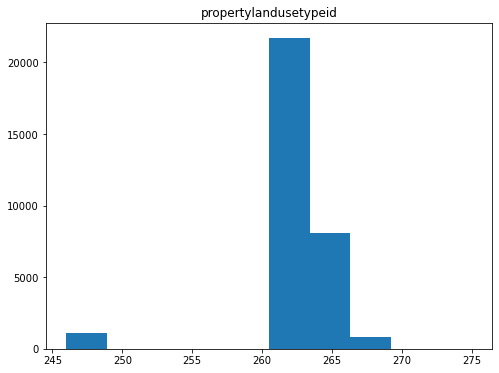

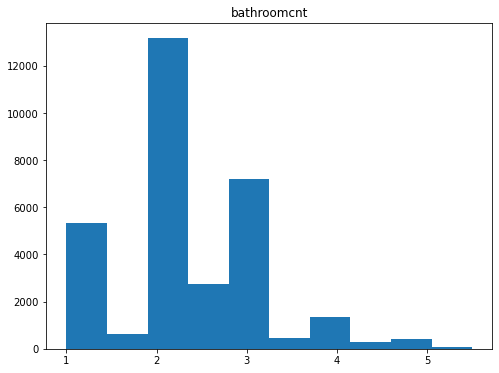

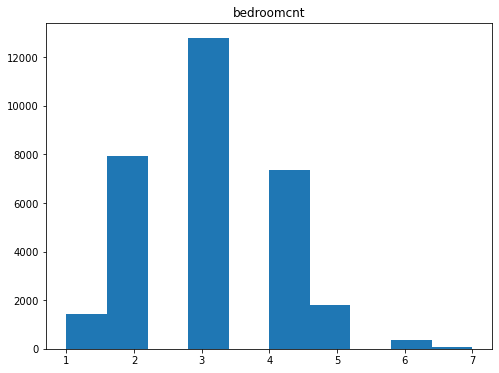

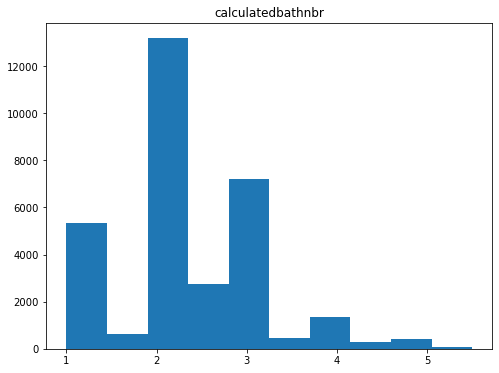

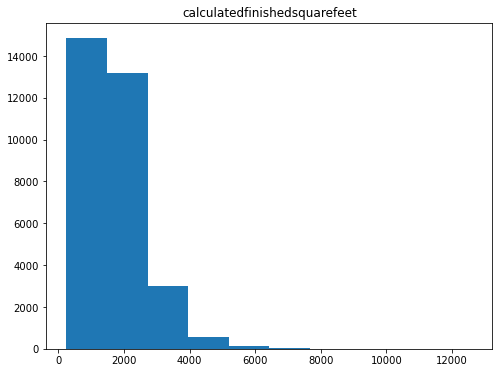

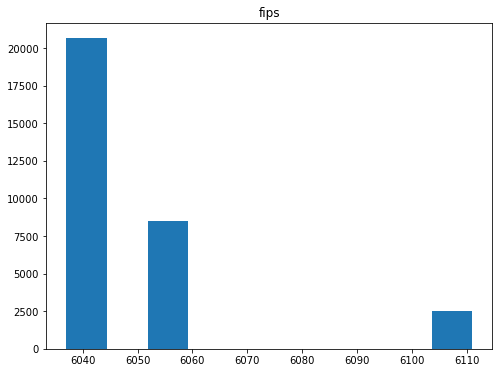

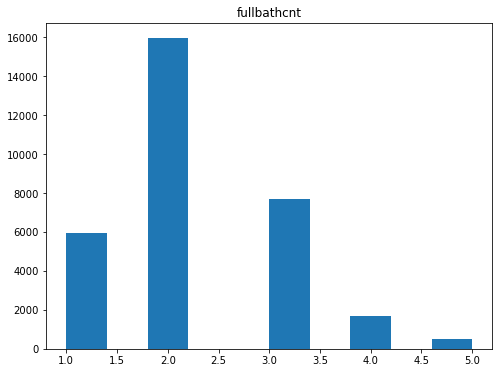

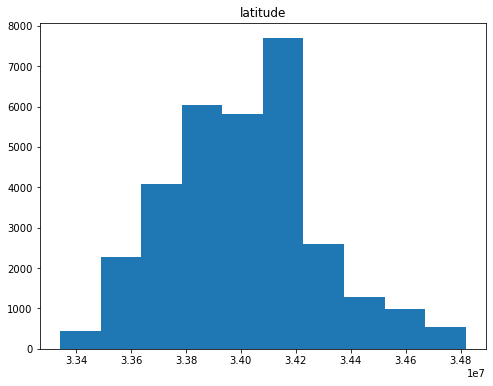

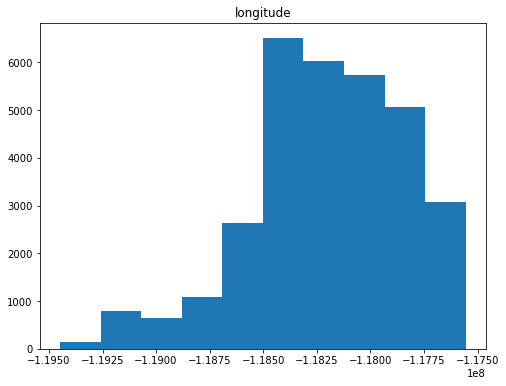

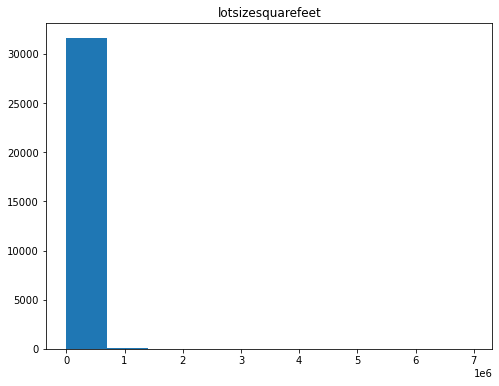

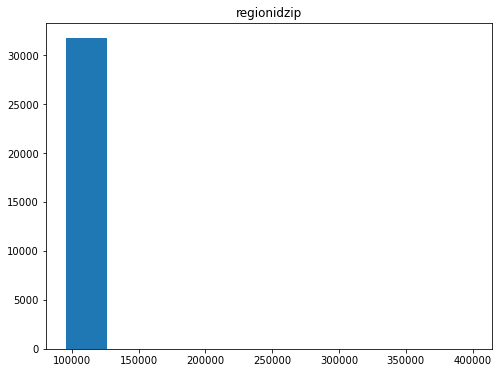

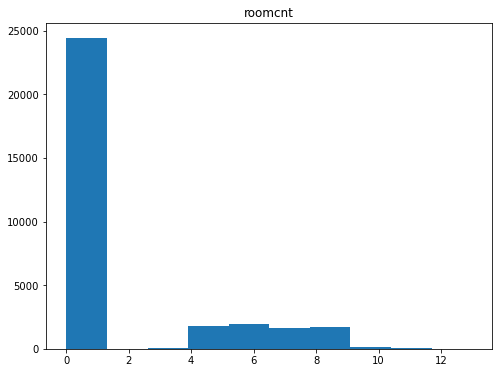

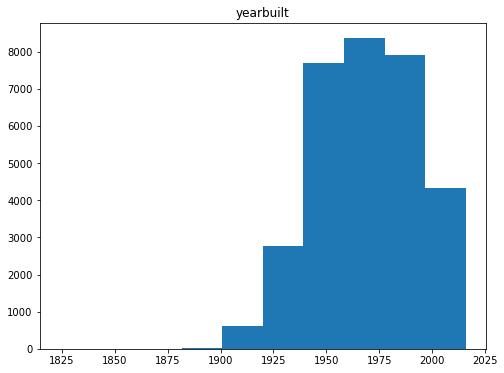

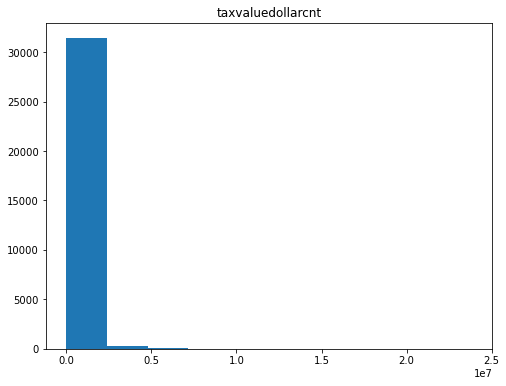

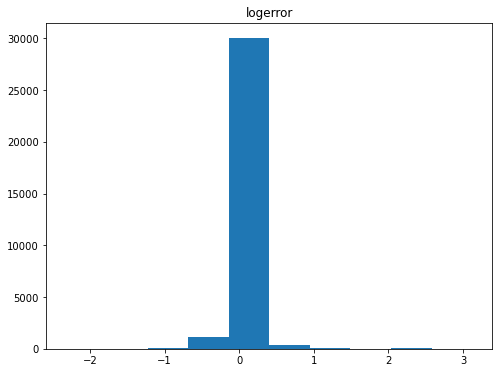

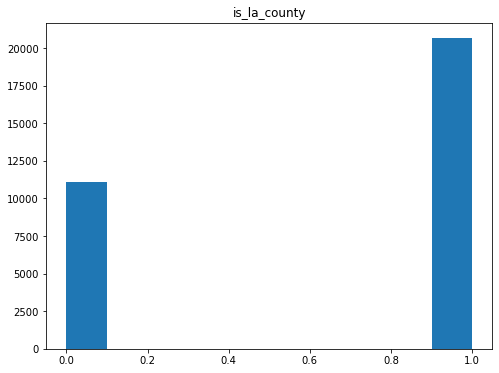

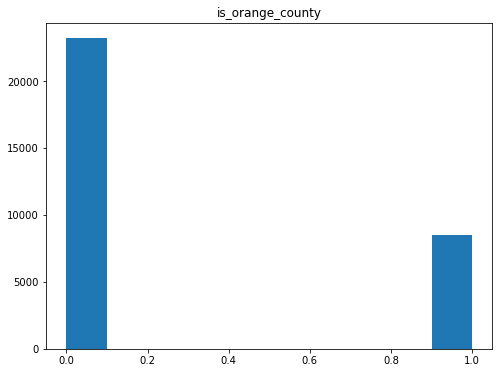

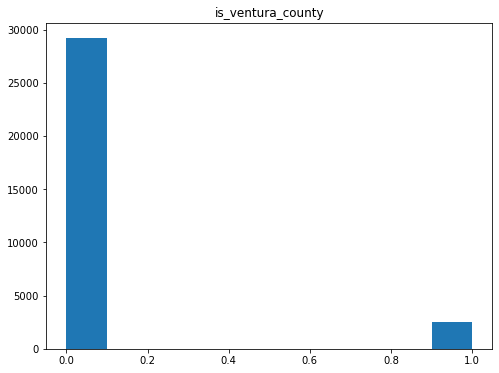

In [7]:
for column in X_train.columns:
    plt.figure(figsize=(8,6))
    plt.hist(X_train[column])
    plt.title(column)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

# Takeaways
- Log error is pretty accurate and only deviates about 2 from zero but overall very accurate.

- There are fewer outliers present after I removed houses that have more than 8 bedrooms, since the buying market is very niche at those price points.

- There are quite a lot of homes still being sold that were built before the 70's

- There also appears to be a reduction in home production in the 2000's, unsure if this was due to market crash or lack of space.

- Room count does not appear to be an accurate feature to use for our predictions

- Fips would be a good feature to cluster on, this would aide in addressing the outliers

- I still like bedroom, bathroom, full bathroom as features for my modeling. These features aided a lot in the

- Calculated bath and bedroom count is redundant info based on the histograms

In [8]:
X_train.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
30392,261.000000,2.000000,4.000000,2.000000,2399.000000,6059.000000,2.000000,33649079.000000,-117968922.000000,6002.000000,96964.000000,8.000000,1965.000000,461143.000000,0.007675,0,1,0
23301,261.000000,1.000000,2.000000,1.000000,990.000000,6037.000000,1.000000,34108171.000000,-118200436.000000,2402.000000,96023.000000,0.000000,1922.000000,187177.000000,-0.445277,1,0,0
45942,261.000000,2.000000,4.000000,2.000000,1992.000000,6037.000000,2.000000,34276990.000000,-118295164.000000,11047.000000,96284.000000,0.000000,1966.000000,605786.000000,-0.012347,1,0,0
43613,266.000000,4.000000,3.000000,4.000000,1969.000000,6037.000000,4.000000,33880447.000000,-118406090.000000,3334.000000,96117.000000,0.000000,1994.000000,2049072.000000,0.080601,1,0,0
64970,261.000000,1.000000,2.000000,1.000000,816.000000,6059.000000,1.000000,33838044.000000,-118043849.000000,1601.000000,96183.000000,5.000000,1970.000000,279839.000000,0.046406,0,1,0


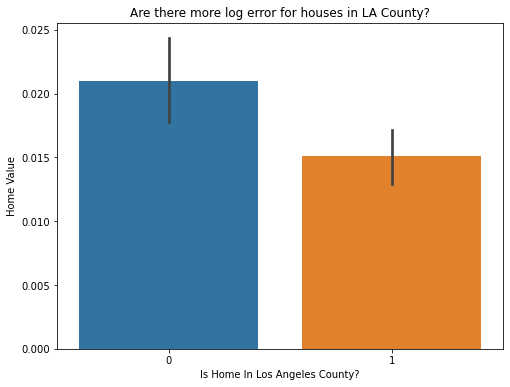

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_la_county, X_train.logerror)
plt.title("Are there more log error for houses in LA County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Los Angeles County?')
plt.show()

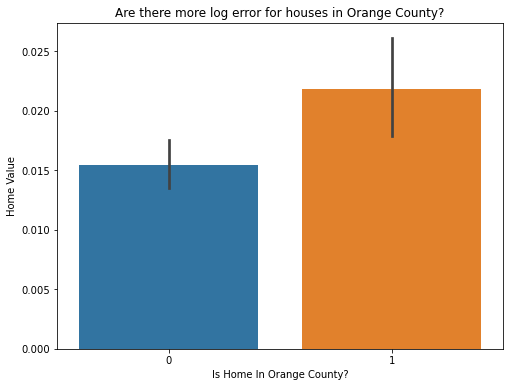

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_orange_county, X_train.logerror)
plt.title("Are there more log error for houses in Orange County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Orange County?')
plt.show()

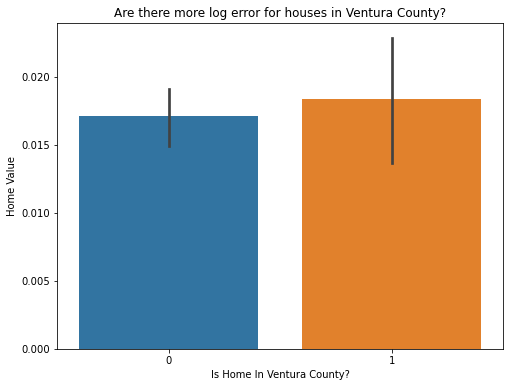

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_ventura_county, X_train.logerror)
plt.title("Are there more log error for houses in Ventura County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Ventura County?')
plt.show()

# Hypothesis Testing

### Hypothesis Test 1

$H$0 - There is no difference in price between houses in Orange County and Los Angeles/Ventura Counties

$H$a - There is a differen between houses in Orange County and Los Angeles/Ventura Counties

In [12]:
la_county = X_train[X_train.is_la_county == 1]
not_la_county = X_train[X_train.is_la_county == 0]

stats.levene(la_county.logerror, not_la_county.logerror)

LeveneResult(statistic=30.602538043131446, pvalue=3.191754205269759e-08)

In [13]:
stats.ttest_ind(la_county.logerror, 
                not_la_county.logerror, 
                equal_var=True)

Ttest_indResult(statistic=-3.003542057549895, pvalue=0.002670647323173988)

## Conclusion
- p < alpha of .05, we reject the null hypothesis and there is a difference in log error for homes in LA county

Is There A Relationship Between Home Value And Square Feet?


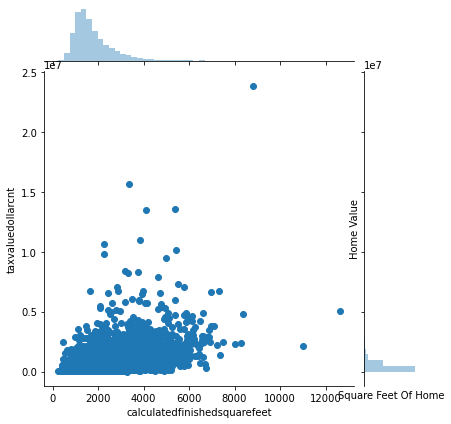

In [14]:
print('Is There A Relationship Between Home Value And Square Feet?')
sns.jointplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', data=X_train)
plt.xlabel("Square Feet Of Home")
plt.ylabel("Home Value")
plt.show()

## Conclusion
- There appears to be a linear relationship between square feet of home and the value of the home
- This will be valueable when we begin our modeling and selecting best features

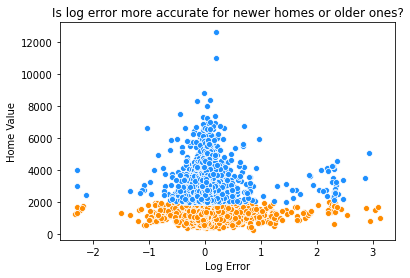

In [15]:
sns.scatterplot(x='logerror', y='calculatedfinishedsquarefeet',
               data=X_train[X_train.calculatedfinishedsquarefeet<2000], color='darkorange')
sns.scatterplot(x='logerror', y='calculatedfinishedsquarefeet',
               data=X_train[X_train.calculatedfinishedsquarefeet>=2000], 
                color='dodgerblue')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Is log error more accurate for newer homes or older ones?")
plt.ylabel('Home Value')
plt.xlabel('Log Error')
plt.show()

## Conclusion
- It appears that most of the error occurs in the homes older than 2000
- This information will be very helpful to consider when we start assessing clusters

## Hypothesis Test 2

In [16]:
sqft_greater_than_1500 = X_train[X_train.calculatedfinishedsquarefeet >= 1500]
sqft_less_than_1500 = X_train[X_train.calculatedfinishedsquarefeet < 1500]

stats.levene(sqft_greater_than_1500.logerror, sqft_less_than_1500.logerror)

LeveneResult(statistic=0.30922776536812535, pvalue=0.5781583683847642)

## Conclusion
- p > alpha of .05, we fail to reject the null and although the graph appears to show some correlation that log error is higher on houses that are less than 1500 sqft, it is not related.

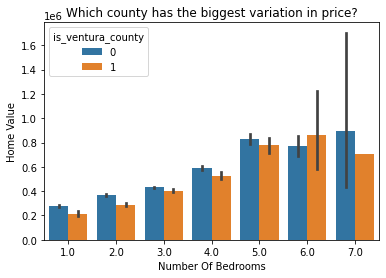

In [17]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_ventura_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

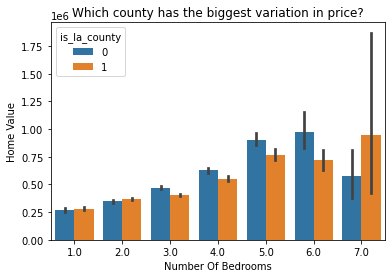

In [18]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_la_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

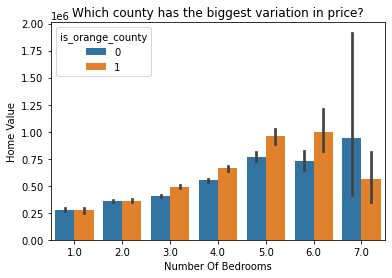

In [19]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_orange_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

## Conclusion
- The most variance in price valuation appears to be in ventura which explains why the original model was innaccurate on bigger homes
- The most consistent changes in price appears to be orange county
- The most linear prices is going to be la county which the original model preformed best on those houses last time

In [20]:
X_train.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
30392,261.000000,2.000000,4.000000,2.000000,2399.000000,6059.000000,2.000000,33649079.000000,-117968922.000000,6002.000000,96964.000000,8.000000,1965.000000,461143.000000,0.007675,0,1,0
23301,261.000000,1.000000,2.000000,1.000000,990.000000,6037.000000,1.000000,34108171.000000,-118200436.000000,2402.000000,96023.000000,0.000000,1922.000000,187177.000000,-0.445277,1,0,0
45942,261.000000,2.000000,4.000000,2.000000,1992.000000,6037.000000,2.000000,34276990.000000,-118295164.000000,11047.000000,96284.000000,0.000000,1966.000000,605786.000000,-0.012347,1,0,0
43613,266.000000,4.000000,3.000000,4.000000,1969.000000,6037.000000,4.000000,33880447.000000,-118406090.000000,3334.000000,96117.000000,0.000000,1994.000000,2049072.000000,0.080601,1,0,0
64970,261.000000,1.000000,2.000000,1.000000,816.000000,6059.000000,1.000000,33838044.000000,-118043849.000000,1601.000000,96183.000000,5.000000,1970.000000,279839.000000,0.046406,0,1,0


In [21]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.min_max_scale(X_train, X_validate, X_test)

In [22]:
from sklearn.cluster import KMeans
X1 = X_train_scaled[['propertylandusetypeid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 
           'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'latitude', 'longitude', 
           'lotsizesquarefeet', 'regionidzip', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']]
X2 = X_validate_scaled[['propertylandusetypeid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 
           'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'latitude', 'longitude', 
           'lotsizesquarefeet', 'regionidzip', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']]
X3 = X_test_scaled[['propertylandusetypeid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 
           'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'latitude', 'longitude', 
           'lotsizesquarefeet', 'regionidzip', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)

KMeans(n_clusters=4)

In [23]:
pd.DataFrame(kmeans.cluster_centers_, columns=X1.columns)

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt
0,0.565984,0.300687,0.376067,0.300687,0.133672,1.000000,0.293324,0.608034,0.245064,0.001987,0.003072,0.496470,0.807583,0.018785
1,0.569906,0.265909,0.334545,0.265956,0.115111,0.297297,0.251398,0.245804,0.859132,0.001860,0.003129,0.325643,0.789896,0.018683
2,0.548311,0.518848,0.446892,0.518848,0.180498,0.038641,0.574689,0.500894,0.641071,0.005324,0.001867,0.008562,0.805983,0.030550
3,0.540831,0.148523,0.274675,0.148523,0.086901,0.006724,0.166745,0.499951,0.640840,0.005420,0.001167,0.000239,0.694045,0.013637


In [24]:
X1.shape

(31725, 14)

In [25]:
X_train_scaled['cluster'] = kmeans.predict(X1)
X_train['cluster'] = kmeans.predict(X1)
X_validate_scaled['cluster'] = kmeans.predict(X2)
X_validate['cluster'] = kmeans.predict(X2)
X_test_scaled['cluster'] = kmeans.predict(X3)
X_test['cluster'] = kmeans.predict(X3)

In [26]:
X_train.groupby('cluster').mean()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
cluster,,,,,,,,,,,,,,,,,,
0,262.413549,2.353092,3.256400,2.353092,1896.051682,6111.000000,2.173297,34239620.306420,-118984301.136668,14282.280051,96914.850900,6.454116,1979.055925,449150.731390,0.018325,0.000000,0.000000,1.000000
1,262.526838,2.197722,3.008527,2.197936,1667.223106,6059.000000,2.006850,33704407.089181,-117821434.932765,13400.691041,96932.150326,4.234554,1975.668221,447189.817864,0.018429,0.000000,1.000000,0.000000
2,261.899744,3.334839,3.681158,3.334839,2475.562706,6039.847723,3.298815,34081543.938698,-118234610.328489,37555.923598,96548.796885,0.109293,1978.741715,729686.664062,0.020375,0.870558,0.129442,0.000000
3,261.685039,1.668280,2.647836,1.668280,1317.200607,6037.502203,1.666835,34079845.114209,-118234693.916059,38215.162318,96336.404694,0.003106,1957.261707,326310.509138,0.014434,0.977173,0.022827,0.000000


In [27]:
X_train_scaled.groupby('cluster').size()

cluster
0     2539
1     7154
2     8189
3    13843
dtype: int64

[Text(0, 0.5, 'Square Footage Of Home'), Text(0.5, 0, 'Log Error')]

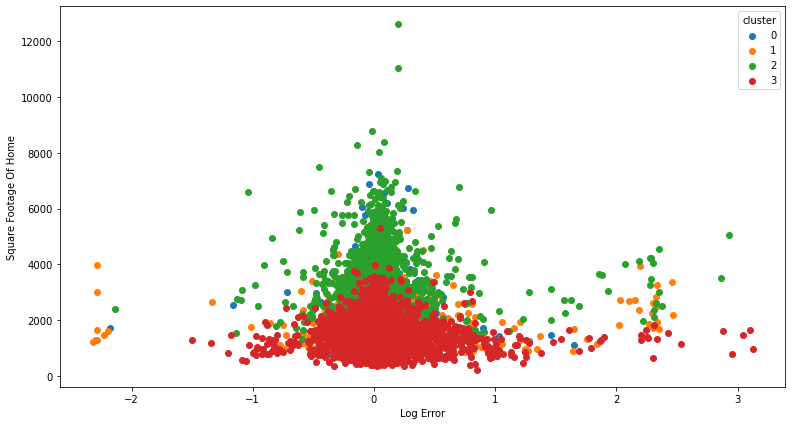

In [28]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train.groupby('cluster'):
    ax.scatter(subset.logerror, subset.calculatedfinishedsquarefeet, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Square Footage Of Home', xlabel='Log Error')


In [29]:
kmeans.inertia_

5024.785613298001

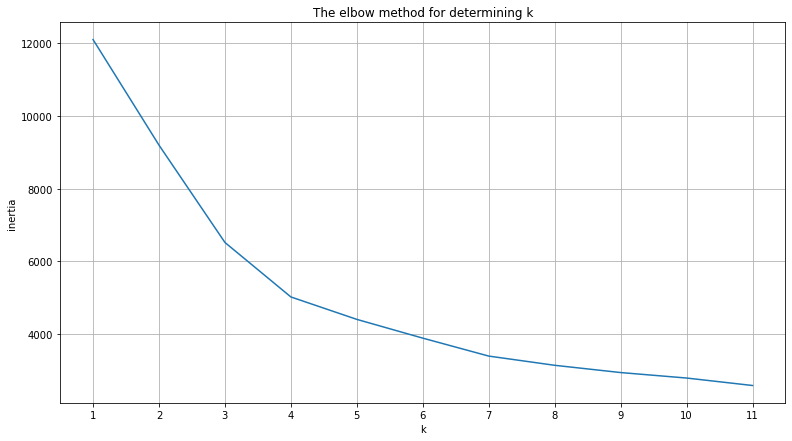

In [30]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

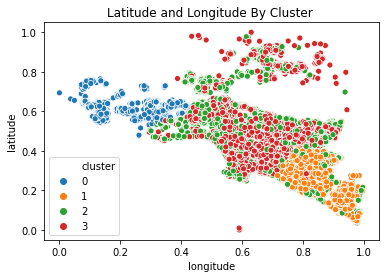

In [31]:
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=X_train_scaled, palette='tab10')
plt.title("Latitude and Longitude By Cluster ")
plt.show()

Text(0.5, 1.0, 'Year Built vs Log Error By Clusters')

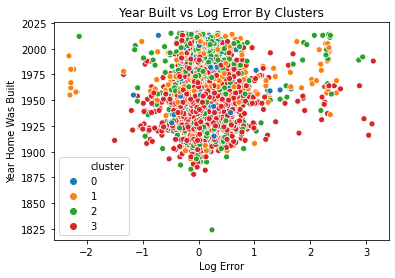

In [32]:
sns.scatterplot(x='logerror', y='yearbuilt', hue='cluster', data=X_train, palette='tab10')
plt.ylabel('Year Home Was Built')
plt.xlabel('Log Error')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Year Built vs Log Error By Clusters')

In [33]:
X_train_scaled.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,cluster
30392,0.517241,0.222222,0.500000,0.222222,0.174317,0.297297,0.250000,0.208356,0.781236,0.000799,0.003234,0.615385,0.734375,0.019287,1
23301,0.517241,0.000000,0.166667,0.000000,0.060449,0.000000,0.000000,0.519069,0.658985,0.000282,0.000135,0.000000,0.510417,0.007804,3
45942,0.517241,0.222222,0.500000,0.222222,0.141426,0.000000,0.250000,0.633326,0.608963,0.001522,0.000994,0.000000,0.739583,0.025350,3
43613,0.689655,0.666667,0.333333,0.666667,0.139567,0.000000,0.750000,0.364946,0.550389,0.000416,0.000445,0.000000,0.885417,0.085846,2
64970,0.517241,0.000000,0.166667,0.000000,0.046388,0.297297,0.000000,0.336247,0.741671,0.000167,0.000662,0.384615,0.760417,0.011688,1


In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
## Assessing the RFE using a linear regression model
lm = LinearRegression()

rfe = RFE(lm, 5)
lm_X_rfe_train = rfe.fit_transform(X_train_scaled,y_train)
lm_X_rfe_val = rfe.fit_transform(X_validate_scaled,y_validate)
lm_X_rfe_test = rfe.fit_transform(X_test_scaled,y_test)

In [36]:
## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train_scaled.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 5 features: bathroomcnt, calculatedbathnbr, calculatedfinishedsquarefeet, lotsizesquarefeet, taxvaluedollarcnt


In [37]:
lm.fit(lm_X_rfe_train, y_train)

LinearRegression()

In [38]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [0.00551802]
features:  Index(['bathroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'taxvaluedollarcnt'],
      dtype='object')
coefficients:  [[ 0.42661848 -0.43432515  0.15032883  0.13924665 -0.2542502 ]]


In [39]:
## Here we're going to add a column that will make property value predictions using the linear model
y_train['yhat_lm'] = lm.predict(lm_X_rfe_train)

y_train.head()

,logerror,yhat_lm
30392,0.007675,0.025218
23301,-0.445277,0.012660
45942,-0.012347,0.018832
43613,0.080601,-0.000407
64970,0.046406,0.009543


In [40]:
## Checking the mean squared error of the model
RMSE_lm = np.sqrt(mean_squared_error(y_train.logerror, y_train.yhat_lm))
RMSE_lm

0.1658503274530177

In [41]:
r2_lm = lm.score(lm_X_rfe_train, y_train.logerror)
r2_lm

0.002315901585166591

In [42]:
lm.fit(lm_X_rfe_val, y_validate)

LinearRegression()

In [43]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [0.00289995]
features:  Index(['bathroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'taxvaluedollarcnt'],
      dtype='object')
coefficients:  [[-0.1913089   0.1840531   0.15768229  0.08749797 -0.27700793]]


In [44]:
## Here we're going to add a column that will make property value predictions using the linear model
y_validate['yhat_lm'] = lm.predict(lm_X_rfe_val)

y_validate.head()

,logerror,yhat_lm
69236,-0.014323,0.011961
69223,0.015813,0.003200
1890,-0.093132,0.016664
35365,-0.032451,0.015544
11597,-0.018133,0.014729


0.16325414153254536
0.0


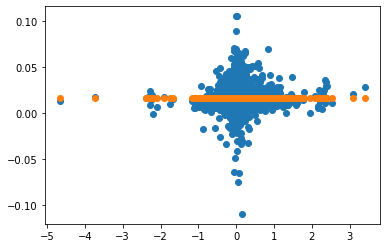

In [45]:
y_validate['yhat_baseline'] = df['logerror'].mean()

# compute the RMSE
RMSE_bl = np.sqrt(mean_squared_error(y_validate.logerror, y_validate.yhat_baseline))
print(RMSE_bl)

# no need to compute R-2 because it will be a 0! But we will demonstrate here:
evs = explained_variance_score(y_validate.logerror, y_validate.yhat_baseline)
print(evs)
plt.scatter(y_validate.logerror, y_validate.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

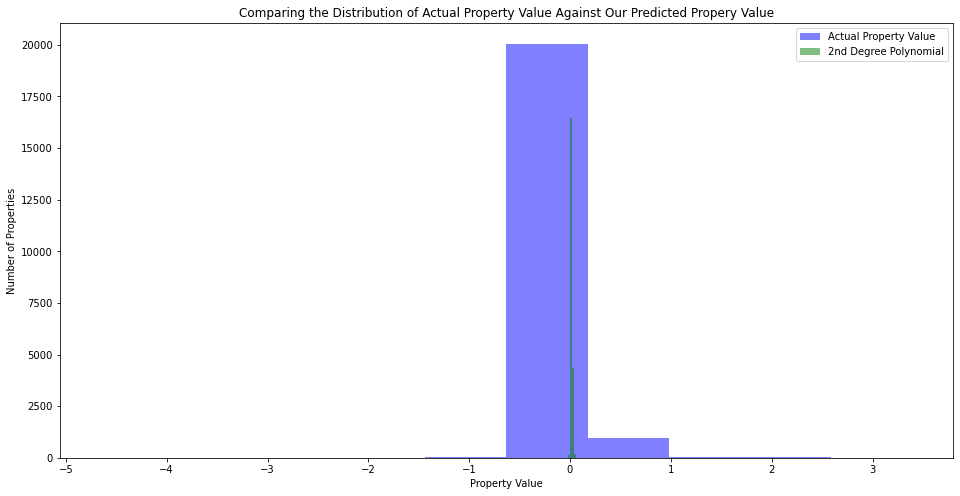

In [46]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.logerror, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_validate.yhat_lm, color='green', alpha=.5, label="2nd Degree Polynomial")
plt.xlabel("Property Value")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Property Value Against Our Predicted Propery Value")
plt.legend()
plt.show()

# 4th Degree Polynomial Model

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_X_rfe_train = rfe.fit_transform(X_train, y_train)
poly_X_rfe_val = rfe.transform(X_validate)
poly_X_rfe_test = rfe.transform(X_test)

# make the polynomial features to get a new set of features
pf_4 = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf_4.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf_4.transform(poly_X_rfe_val)
X_test_degree4 = pf_4.transform(poly_X_rfe_test)

In [48]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree4, y_train.logerror)

# predict train
y_train['yhat_poly_1'] = lm2.predict(X_train_degree4)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.yhat_poly_1)**1/2

# predict validate
y_validate['yhat_poly_1'] = lm2.predict(X_validate_degree4)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.yhat_poly_1)**1/2

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))


RMSE for Polynomial Model, degrees=4
Training/In-Sample:  0.000000000000000000000000000000158 
Validation/Out-of-Sample:  0.000000000000000574963628354314781


In [49]:
# 3rd Degree Polynomial Model

In [50]:
# make the polynomial features to get a new set of features
pf_3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf_3.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf_3.transform(poly_X_rfe_val)
X_test_degree3 = pf_3.transform(poly_X_rfe_test)

In [51]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree3, y_train.logerror)

# predict train
y_train['yhat_poly_2'] = lm2.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.yhat_poly_2)**1/2

# predict validate
y_validate['yhat_poly_2'] = lm2.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.yhat_poly_2)**1/2

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  0.000000000000000000000000000000861 
Validation/Out-of-Sample:  0.000000000000024306083085182712969


In [52]:
# 2nd Degree Polynomial Model

In [53]:
# make the polynomial features to get a new set of features
pf_2 = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf_2.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf_2.transform(poly_X_rfe_val)
X_test_degree2 = pf_2.transform(poly_X_rfe_test)

In [54]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['yhat_poly_3'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.yhat_poly_3)**1/2

# predict validate
y_validate['yhat_poly_3'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.yhat_poly_3)**1/2

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.000000000000000000000000000000132 
Validation/Out-of-Sample:  0.000000000000000000000000000000123


In [55]:
y_validate.head()

,logerror,yhat_lm,yhat_baseline,yhat_poly_1,yhat_poly_2,yhat_poly_3
69236,-0.014323,0.011961,0.016213,-0.014323,-0.014323,-0.014323
69223,0.015813,0.003200,0.016213,0.015813,0.015813,0.015813
1890,-0.093132,0.016664,0.016213,-0.093132,-0.093132,-0.093132
35365,-0.032451,0.015544,0.016213,-0.032451,-0.032451,-0.032451
11597,-0.018133,0.014729,0.016213,-0.018133,-0.018133,-0.018133


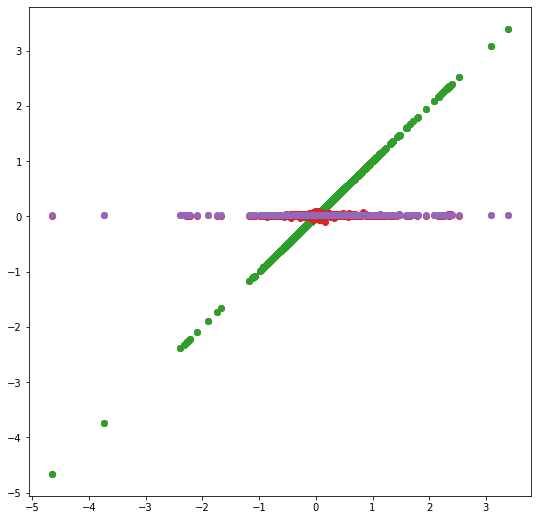

In [56]:
plt.figure(figsize=(9, 9))
plt.scatter(y_validate.logerror, y_validate.yhat_poly_1, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_poly_2, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_poly_3, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

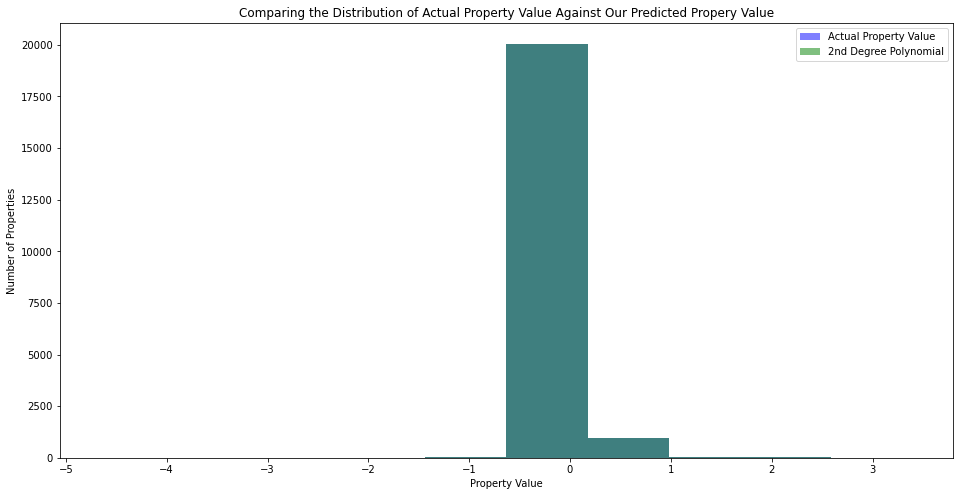

In [57]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.logerror, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_validate.yhat_poly_3, color='green', alpha=.5, label="2nd Degree Polynomial")
plt.xlabel("Property Value")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Property Value Against Our Predicted Propery Value")
plt.legend()
plt.show()

In [58]:
# predict validate
y_test['yhat_poly'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.yhat_poly)**1/2

print("RMSE for Polynomial Model, degrees=2\nValidation/Out-Of-Sample: ", '{:.33f}'.format(rmse_validate), 
      "\nTest/Out-of-Sample: ", '{:.33f}'.format(rmse_test))

RMSE for Polynomial Model, degrees=2
Validation/Out-Of-Sample:  0.000000000000000000000000000000123 
Test/Out-of-Sample:  0.000000000000000000000000000000173


In [59]:
y_test.head()

,logerror,yhat_poly
28233,-0.055510,-0.055510
48250,0.002652,0.002652
24164,0.027435,0.027435
48666,-0.000122,-0.000122
42343,0.178914,0.178914


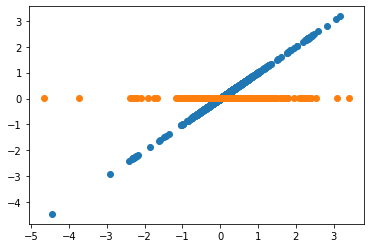

In [60]:
plt.scatter(y_test.logerror, y_test.yhat_poly, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

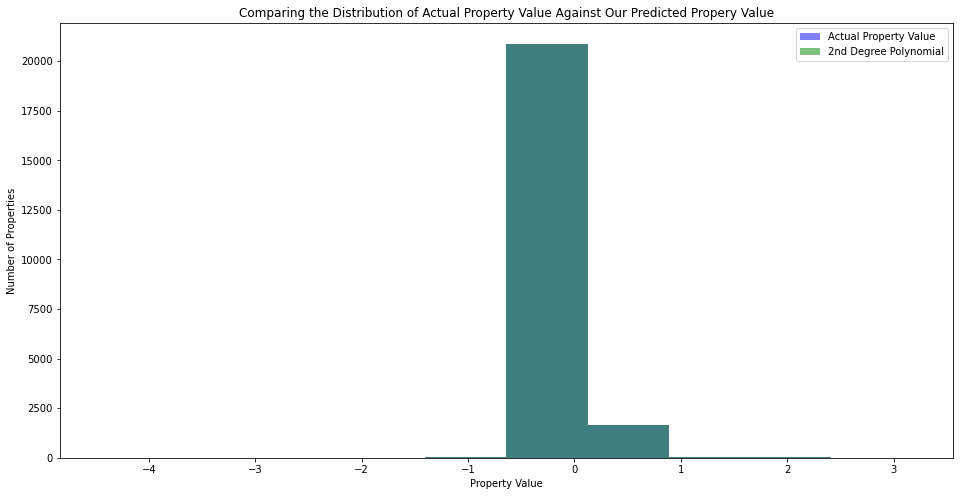

In [61]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_test.logerror, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_test.yhat_poly, color='green', alpha=.5, label="2nd Degree Polynomial")
plt.xlabel("Property Value")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Property Value Against Our Predicted Propery Value")
plt.legend()
plt.show()

In [63]:
y_test['perc_error'] = ((y_test.logerror - y_test.yhat_poly) / y_test.logerror) * 100
y_test

,logerror,yhat_poly,perc_error
28233,-0.055510,-0.055510,0.000000
48250,0.002652,0.002652,-0.000000
24164,0.027435,0.027435,-0.000000
48666,-0.000122,-0.000122,0.000000
42343,0.178914,0.178914,0.000000
...,...,...,...
15070,0.011109,0.011109,-0.000000
54392,0.103840,0.103840,0.000000
44488,-0.044679,-0.044679,0.000000
57192,0.018937,0.018937,0.000000


In [71]:
print('The MVP Model was, ''{:.33f}'.format(y_test.perc_error.sum()), '% off actual')

The MVP Model was, -0.000000009240225267614809680615114 % off actual
